# Predicting Events Using Continuous Probability Distribution

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import statistics as st
import scipy.stats as sts
from scipy.stats import norm
import matplotlib.pyplot as plt

-1568 4232
[-1568 -1567 -1566 ...  4229  4230  4231]


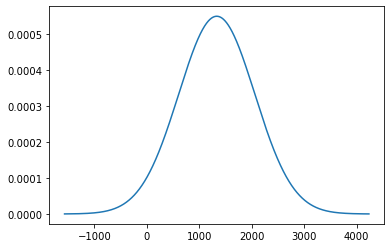

In [2]:
# Task 1
mean_p=1332
sd_p=725
lower_p=mean_p-4*sd_p
upper_p=mean_p+4*sd_p
print(lower_p,upper_p)
norm_p=np.arange(lower_p,upper_p)
print(norm_p)
plt.plot(norm_p,norm.pdf(norm_p,mean_p,sd_p))
plt.show()

In [3]:
# a)
a=norm.cdf(2000,mean_p,sd_p)
print('The Proportion of tax return are greater the $2000:',round((1-a),3))

The Proportion of tax return are greater the $2000: 0.178


The Proportion of tax return are greater the $2000: 0.178


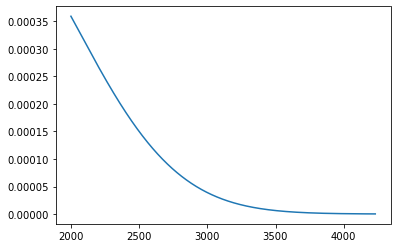

In [4]:
a1=norm.pdf(norm_p,mean_p,sd_p)
a2=[]
a3=[]
sum_a=0
for i,a in zip(a1,norm_p):
    if a>2000:
        sum_a=sum_a+i
        a2.append(i)
        a3.append(a)
    else:
        continue

print('The Proportion of tax return are greater the $2000:',round(sum_a,3))
plt.plot(a3,a2)
plt.show()

The Proportion of tax 0.033


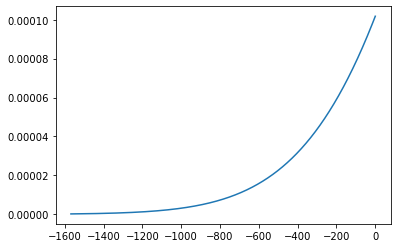

In [5]:
# b)
b=norm.pdf(norm_p,mean_p,sd_p)
b1=[]
b2=[]
sum_b=0
for i,b in zip(b,norm_p):
    if b<=0:
        sum_b=sum_b+i
        b1.append(i)
        b2.append(b)
    else:
        continue
        
print('The Proportion of tax',round(sum_b,3))
plt.plot(b2,b1)
plt.show()

The Proportion of tax return $100 & $700 0.147


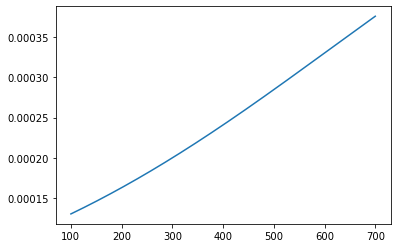

In [6]:
#c)
c=norm.pdf(norm_p,mean_p,sd_p)
c1=[]
c2=[]
sum_c=0
for i,c in zip(c,norm_p):
    if c>=100 and c<=700:
        sum_c=sum_c+i
        c1.append(c)
        c2.append(i)
    else:
        continue
print('The Proportion of tax return $100 & $700',round(sum_c,3))
plt.plot(c1,c2)
plt.show()

In [7]:
# Task 2
# i)
df=pd.read_csv('DS1_C5_S5_Continuous_Practice_Computers_Data.csv')
print(df.shape)
df=df[df['price']<=4000]
print(df.shape)
df.head()

(6259, 11)
(6229, 11)


,index,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [8]:
# ii
g_df=df.groupby(['screen'])
screens=df.screen.unique()
sample=pd.DataFrame()

for screen in screens:
    g_data=g_df.get_group(screen)
    sample_data=g_data.sample(frac=0.0638,replace=True,random_state=1)
    sample=sample.append(sample_data)
sample.shape

(398, 11)

In [9]:
data_p=df['price']
data_s=sample['price']

mean_s=data_s.mean()
sd_s=st.stdev(data_s)

mean_p=data_p.mean()
sd_p=st.stdev(data_p)

sd_p_s=sd_p/math.sqrt(len(data_s))
print('population standard deviation :',sd_p)
print('sample standard deviation :',sd_s)
print('calculated sample standard deviation:',sd_p_s)

population standard deviation : 560.5012668970269
sample standard deviation : 566.1651304173075
calculated sample standard deviation: 28.095389837722458


In [10]:
lower_s=mean_s-4*sd_s
upper_s=mean_s+4*sd_s
norm_s=np.arange(lower_s,upper_s)

lower_p=mean_p-4*sd_p
upper_p=mean_p+4*sd_p
norm_p=np.arange(lower_p,upper_p)

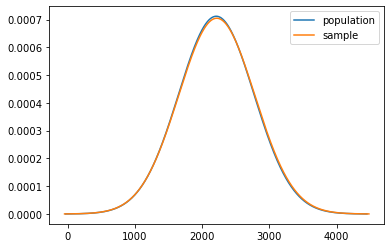

In [11]:
plt.plot(norm_p,norm.pdf(norm_p,mean_p,sd_p),label='population')
plt.plot(norm_s,norm.pdf(norm_s,mean_s,sd_s),label='sample')
plt.legend()
plt.show()

In [12]:
# iii
y=norm.cdf(2700,mean_s,sd_s)
print('a.)Greater than $2700 :',round((1-y),3))
y1=norm.cdf(1301,mean_s,sd_s)
print('b.)Less than $1301 :',round(y1,3))
y2=norm.cdf(2900,mean_s,sd_s)
y3=norm.cdf(2000,mean_s,sd_s)
print('c.)Between $2000 and $2900:',round((y2-y3),3))

a.)Greater than $2700 : 0.196
b.)Less than $1301 : 0.053
c.)Between $2000 and $2900: 0.535


In [13]:
# a)
g1_df=df[['price','screen']].groupby(['screen'])
screens1=df.screen.unique()
sample1=pd.DataFrame()

for screen in screens1:
    g_data=g1_df.get_group(screen)
    sample_data=g_data.sample(frac=0.0638,replace=True,random_state=2)
    sample1=sample1.append(sample_data)
sample1.shape

(398, 2)

In [14]:
#b)
mean_s1=st.mean(sample1['price'])
sd_s1=st.stdev(sample1['price'])
sd_s1_p=sd_p/math.sqrt(len(sample1['price']))
print('population mean:',round(mean_p,3))
print('population standard deviation:',round(sd_p,3))
print('sample mean:',round(mean_s,3))
print('sample standard deviation :',round(sd_s1,3))
print('calculated sample standard deviation:',round(sd_s1_p,3))

population mean: 2208.856
population standard deviation: 560.501
sample mean: 2215.915
sample standard deviation : 560.049
calculated sample standard deviation: 28.095


In [15]:
lower_s1=mean_s1-4*sd_s1
upper_s1=mean_s1+4*sd_s1
norm_s1=np.arange(lower_s1,upper_s1)
print(round(lower_p,3),round(upper_p,3))
print(round(lower_s1,3),round(upper_s1,3))

-33.15 4450.861
-40.788 4439.602


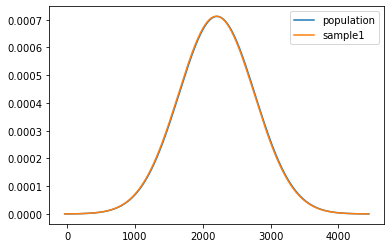

In [16]:
plt.plot(norm_p,norm.pdf(norm_p,mean_p,sd_p),label='population')
plt.plot(norm_s1,norm.pdf(norm_s1,mean_s1,sd_s1),label='sample1')
plt.legend()
plt.show()

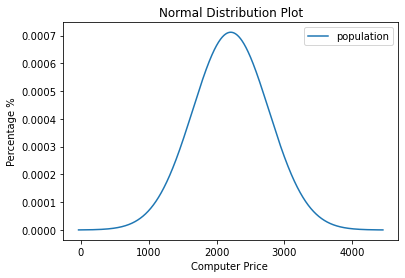

In [17]:
# c)
plt.plot(norm_p,norm.pdf(norm_p,mean_p,sd_p),label='population')
plt.title('Normal Distribution Plot')
plt.xlabel('Computer Price ')
plt.ylabel('Percentage %')
plt.legend()
plt.show()

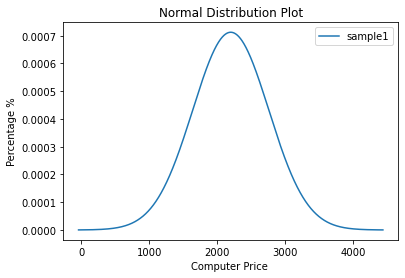

In [18]:
# d)
plt.plot(norm_s1,norm.pdf(norm_s1,mean_s1,sd_s1),label='sample1')
plt.title('Normal Distribution Plot')
plt.xlabel('Computer Price ')
plt.ylabel('Percentage %')
plt.legend()
plt.show()

In [19]:
# e)
standard=[]
for e in norm_s1:
    z_score=(e-mean_s1)/sd_s1
    standard.append(z_score)
# print(standard)

In [20]:
# f)
ranges=np.arange(lower_s1,upper_s1,0.01)
pvalues=[]
for r in ranges:
    pvalues.append(norm.cdf(r))
# print(pvalues)

-0.0050000000000851585
2.3108440016582192


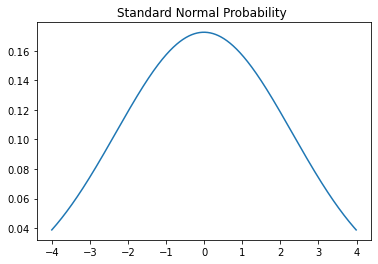

In [22]:
# g)
norm_st=np.arange(standard[0],standard[-1],0.01)
st_mean=st.mean(norm_st)
print(st_mean)
st_std=st.stdev(norm_st)
print(st_std)
plt.plot(norm_st,norm.pdf(norm_st,st_mean,st_std))
plt.title('Standard Normal Probability ')
plt.show()

In [23]:
# h)
h=2700
zh=(h-mean_p)/sd_p
zh_s=(h-mean_s1)/sd_s1
print('The probability of occurence of price greater than $2700:',round((1-norm.cdf(zh)),3))
print('The probability of occurence of price greater than $2700:',round((1-norm.cdf(zh_s)),3))

The probability of occurence of price greater than $2700: 0.19
The probability of occurence of price greater than $2700: 0.186


In [24]:
# i)
i=1301
zi=(i-mean_p)/sd_p
zi_s=(i-mean_s1)/sd_s1
print('The probability of occurence of price less than $1301:',round(norm.cdf(zi),3))
print('The probability of occurence of price less than $1301:',round(norm.cdf(zi_s),5))

The probability of occurence of price less than $1301: 0.053
The probability of occurence of price less than $1301: 0.05434


In [25]:
# j)
j=2900
j1=2000
zj=(j-mean_p)/sd_p
zj_s=(j-mean_s1)/sd_s1
zj1=(j1-mean_p)/sd_p
zj1_s=(j1-mean_s1)/sd_s1
zk=norm.cdf(zj)-norm.cdf(zj1)
zk_s=norm.cdf(zj_s)-norm.cdf(zj1_s)
print('The probability of occurence of between $2000 and $2900:',round(zk,3))
print('The probability of occurence of between $2000 and $2900:',round(zk_s,3))

The probability of occurence of between $2000 and $2900: 0.537
The probability of occurence of between $2000 and $2900: 0.534
